## 5차 과제 - 난 어떤 연예인을 닮았을까?
- 주제: 닮은 연예인 찾기
- 데이터: 연예인 이미지 데이터(구글 이미지 크롤링)
- 사용 라이브러리: BeautifulSoup, selenium, PIL, os, tensorflow
- 사용 툴: Teachable Machine
- 참고 자료 및 출처  
  
https://velog.io/@moon_happy/%EC%97%B0%EC%98%88%EC%9D%B8-%EC%82%AC%EC%A7%84-%ED%81%AC%EB%A1%A4%EB%A7%81-%ED%95%98%EA%B8%B0 

https://dk-kang.tistory.com/entry/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%8B%AE%EC%9D%80%EA%BC%B4-%EC%97%B0%EC%98%88%EC%9D%B8-%EC%B0%BE%EA%B8%B0with-OpenCV-TM#google_vignette

### 1. 이미지 크롤링

1.1 라이브러리 import

In [2]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 960.0 kB/s eta 0:00:41
   ---------------------------------------- 0.1/38.6 MB 2.8 MB/s eta 0:00:14
   ---------------------------------------- 0.3/38.6 MB 2.4 MB/s eta 0:00:16
   ---------------------------------------- 0.3/38.6 MB 2.1 MB/s eta 0:00:19
   ---------------------------------------- 0.4/38.6 MB 1.8 MB/s eta 0:00:22
   ---------------------------------------- 0.4/38.6 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.5/38.6 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.5/38.6 MB 1.4 MB/s eta 0:00:27
    --------------------------------------- 0.6/38.6 MB 1.4 MB/s eta 0:00:27
    --------------------------------------- 0.6/38.6 MB 1.3 MB/s eta 0:00:29
    --------------------------------------- 0.6/38.6 MB 1.3 MB/s eta 0:00:30
    --------------------------------------- 0.7/38.6 MB 1.3 MB/s eta 0:00:30
    

In [34]:
import os
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from PIL import Image
import io
import time
import numpy as np
import cv2
import os
from tqdm import tqdm

1.2 크롬드라이버 경로 설정

In [35]:
# 크롬드라이버 위치 설정
DRIVER_PATH = 'C:/Users/user/Downloads/chromedriver-win64/chromedriver.exe'

1.3 연예인 리스트 만들기(자유롭게 추가하셔도 됩니다!)

In [36]:
listm = [
    "이병헌", "김태희", "송혜교", "이정재", "송중기", "전지현", "현빈", "한가인", "박서준", "박보검",
    "김소현", "박신혜", "이종석", "공효진", "공유", "김유정", "수지", "김래원", "한효주", "이민호",
    "유재석", "아이유", "윤아", "차승원", "신민아", "김수현", "정우성", "송지효", "이동욱", "신세경",
    "하정우", "이선균", "김혜수", "이하늬", "장동건", "이명박", "장나라", "탐켄치", "황정음", "고현정",
    "유아인", "손예진", "김래원", "강동원", "나문희", "감스트", "이제훈", "박해일", "공효진", "조승우",
    "정경호", "카리나", "빅맘", "설윤", "마동석", "강호동", "이수지", "탁재훈", "김구라", "정종철",
    "박휘순", "조진세", "윈터", "싸이", "박명수", "조정치", "신지", "문채원", "문재인", "이유영"
]

In [37]:
from selenium import webdriver
url = "https://www.naver.com"
driver = webdriver.Chrome()
driver.maximize_window()
driver.get(url)

In [40]:
with tqdm(total=len(listm)) as pbar:
    for i in listm:
        options = Options()
        #chrome_options = webdriver.ChromeOptions()
        options.add_argument('--headless')  # 창 안띄우기

        # 검색어 설정
        search_name = i
        # 검색어를 이용한 구글 이미지 검색 url
        url = f'https://www.google.com/search?q={search_name}+얼굴&source=lnms&tbm=isch'
        # 크롬 드라이버 실행
        driver = webdriver.Chrome(DRIVER_PATH, options=options)
        # url 접속
        driver.get(url)
        # 페이지 로드를 위한 대기 시간
        time.sleep(2)
        # 이미지 로딩을 위한 스크롤 다운
        # 페이지의 초기 높이
        initial_height = driver.execute_script("return document.body.scrollHeight")
        # 페이지 맨 아래로 스크롤
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)
        # 페이지의 새로운 높이
        new_height = driver.execute_script("return document.body.scrollHeight")

        # 페이지의 초기 높이와 새로운 높이를 비교하여 스크롤이 되었는지 확인합니다.
        if new_height > initial_height:
            print("Scrolling successful.")
        else:
            print("No scrolling occurred.")
        # 이미지 링크 추출
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        img_tags = soup.find_all('img')
        urls = []
        for img in img_tags:
          try:
              url = img['src']
              if 'http' in url:
                  urls.append(url)
          except:
              pass
        # 이미지 다운로드
        os.makedirs(f'./images{search_name}', exist_ok=True)
        count = 0
        for url in urls:
          try:
              response = requests.get(url, stream=True)
              # 이미지 사이즈 확인
              img = Image.open(io.BytesIO(response.content))
              width, height = img.size
              if width >= 20 and height >= 20:
                  file_name = f'./images{search_name}/{count}.jpg'
                  with open(file_name, 'wb') as out_file:
                      out_file.write(response.content)
                  #print(f'{file_name} saved')
                  count += 1
                  if count == 20:
                      break
          except:
              pass
        # 크롬 드라이버 종료
        driver.quit()
        
        # tqdm 업데이트
        pbar.update(1)

  0%|                                                                                          | 0/70 [00:00<?, ?it/s]


TypeError: WebDriver.__init__() got multiple values for argument 'options'

In [42]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import requests
import os
import io
from PIL import Image
import time
from tqdm import tqdm
# 크롬드라이버 위치 설정
DRIVER_PATH = "C:/Users/user/Downloads/chromedriver-win64/chromedriver.exe"
listm = [
    "이병헌", "김태희", "송혜교", "이정재", "송중기", "전지현", "현빈", "한가인", "박서준", "박보검",
    "김소현", "박신혜", "이종석", "공효진", "공유", "김유정", "수지", "김래원", "한효주", "이민호",
    "유재석", "아이유", "윤아", "차승원", "신민아", "김수현", "정우성", "송지효", "이동욱", "신세경",
    "하정우", "이선균", "김혜수", "이하늬", "장동건", "이명박", "장나라", "탐켄치", "황정음", "고현정",
    "유아인", "손예진", "김래원", "강동원", "나문희", "감스트", "이제훈", "박해일", "공효진", "조승우",
    "정경호", "카리나", "빅맘", "설윤", "마동석", "강호동", "이수지", "탁재훈", "김구라", "정종철",
    "박휘순", "조진세", "윈터", "싸이", "박명수", "조정치", "신지", "문채원", "문재인", "이유영"
]
# 진행 상태를 보여주는 프로그래스 바
with tqdm(total=len(listm)) as pbar:
    for name in listm:
        # options = Options()
        # options.add_argument('--headless')  # 창 안띄우기
        driver = webdriver.Chrome()
        # 검색어를 이용한 구글 이미지 검색 URL
        search_url = f'https://www.google.com/search?q={name}+얼굴&source=lnms&tbm=isch'
        driver.get(search_url)
        # 페이지 로드 대기
        time.sleep(2)
        # 스크롤 다운으로 이미지 더 불러오기
        initial_height = driver.execute_script("return document.body.scrollHeight")
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height > initial_height:
            print(f"Scrolling successful for {name}")
        else:
            print(f"No scrolling occurred for {name}")
        # 이미지 링크 추출
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        img_tags = soup.find_all('img')
        urls = [img['src'] for img in img_tags if img.get('src', '').startswith('http')]
        # 이미지 저장 폴더 생성
        os.makedirs(f'./images/{name}', exist_ok=True)
        count = 0
        # 이미지 다운로드
        for img_url in urls:
            try:
                response = requests.get(img_url, stream=True)
                img = Image.open(io.BytesIO(response.content))
                width, height = img.size
                if width >= 20 and height >= 20:
                    file_path = f'./images/{name}/{count}.jpg'
                    with open(file_path, 'wb') as out_file:
                        out_file.write(response.content)
                    count += 1
                    if count == 20:  # 최대 20개 이미지 저장
                        break
            except Exception as e:
                print(f"Error downloading image for {name}: {e}")
        driver.quit()
        pbar.update(1)

  0%|                                                                                          | 0/70 [00:00<?, ?it/s]

Scrolling successful for 이병헌
Error downloading image for 이병헌: cannot identify image file <_io.BytesIO object at 0x0000021215BFCCC0>


  1%|█▏                                                                                | 1/70 [00:23<26:48, 23.31s/it]

Scrolling successful for 김태희
Error downloading image for 김태희: cannot identify image file <_io.BytesIO object at 0x0000021216A47CE0>


  3%|██▎                                                                               | 2/70 [00:49<28:28, 25.13s/it]

Scrolling successful for 송혜교
Error downloading image for 송혜교: cannot identify image file <_io.BytesIO object at 0x00000212148787C0>


  4%|███▌                                                                              | 3/70 [01:15<28:36, 25.62s/it]

Scrolling successful for 이정재
Error downloading image for 이정재: cannot identify image file <_io.BytesIO object at 0x00000212150C8D10>


  6%|████▋                                                                             | 4/70 [01:41<27:58, 25.43s/it]

Scrolling successful for 송중기
Error downloading image for 송중기: cannot identify image file <_io.BytesIO object at 0x0000021215D5C720>


  7%|█████▊                                                                            | 5/70 [02:08<28:19, 26.14s/it]

Scrolling successful for 전지현
Error downloading image for 전지현: cannot identify image file <_io.BytesIO object at 0x00000212167DC310>


  9%|███████                                                                           | 6/70 [02:36<28:26, 26.66s/it]

Scrolling successful for 현빈


 10%|████████▏                                                                         | 7/70 [03:06<29:15, 27.86s/it]

Scrolling successful for 한가인
Error downloading image for 한가인: cannot identify image file <_io.BytesIO object at 0x00000212143FA160>


 11%|█████████▎                                                                        | 8/70 [03:34<28:41, 27.76s/it]

Scrolling successful for 박서준
Error downloading image for 박서준: cannot identify image file <_io.BytesIO object at 0x00000212167DC360>


 13%|██████████▌                                                                       | 9/70 [04:01<28:04, 27.62s/it]

Scrolling successful for 박보검
Error downloading image for 박보검: cannot identify image file <_io.BytesIO object at 0x0000021214F18EA0>


 14%|███████████▌                                                                     | 10/70 [04:31<28:16, 28.28s/it]

Scrolling successful for 김소현


 16%|████████████▋                                                                    | 11/70 [05:03<28:57, 29.46s/it]

Scrolling successful for 박신혜
Error downloading image for 박신혜: cannot identify image file <_io.BytesIO object at 0x00000212147FF880>


 17%|█████████████▉                                                                   | 12/70 [05:31<28:03, 29.03s/it]

Scrolling successful for 이종석
Error downloading image for 이종석: cannot identify image file <_io.BytesIO object at 0x00000212128DD530>


 19%|███████████████                                                                  | 13/70 [05:59<27:27, 28.90s/it]

Scrolling successful for 공효진
Error downloading image for 공효진: cannot identify image file <_io.BytesIO object at 0x0000021214905CB0>


 20%|████████████████▏                                                                | 14/70 [06:30<27:24, 29.36s/it]

Scrolling successful for 공유


 21%|█████████████████▎                                                               | 15/70 [07:06<28:56, 31.57s/it]

Scrolling successful for 김유정
Error downloading image for 김유정: cannot identify image file <_io.BytesIO object at 0x00000212148C4360>


 23%|██████████████████▌                                                              | 16/70 [07:34<27:16, 30.31s/it]

Scrolling successful for 수지
Error downloading image for 수지: cannot identify image file <_io.BytesIO object at 0x00000212118C9A30>


 24%|███████████████████▋                                                             | 17/70 [08:00<25:44, 29.14s/it]

Scrolling successful for 김래원
Error downloading image for 김래원: cannot identify image file <_io.BytesIO object at 0x0000021214225850>


 26%|████████████████████▊                                                            | 18/70 [08:27<24:37, 28.40s/it]

Scrolling successful for 한효주


 27%|█████████████████████▉                                                           | 19/70 [09:00<25:17, 29.75s/it]

Scrolling successful for 이민호
Error downloading image for 이민호: cannot identify image file <_io.BytesIO object at 0x00000212157863E0>


 29%|███████████████████████▏                                                         | 20/70 [09:27<24:14, 29.10s/it]

Scrolling successful for 유재석
Error downloading image for 유재석: cannot identify image file <_io.BytesIO object at 0x0000021215A99C10>


 30%|████████████████████████▎                                                        | 21/70 [09:53<22:59, 28.15s/it]

Scrolling successful for 아이유


 31%|█████████████████████████▍                                                       | 22/70 [10:21<22:24, 28.01s/it]

Scrolling successful for 윤아
Error downloading image for 윤아: cannot identify image file <_io.BytesIO object at 0x0000021215DCEC00>


 33%|██████████████████████████▌                                                      | 23/70 [10:49<21:58, 28.05s/it]

Scrolling successful for 차승원
Error downloading image for 차승원: cannot identify image file <_io.BytesIO object at 0x0000021214FFE610>


 34%|███████████████████████████▊                                                     | 24/70 [11:15<21:02, 27.44s/it]

Scrolling successful for 신민아
Error downloading image for 신민아: cannot identify image file <_io.BytesIO object at 0x00000212128DD3F0>


 36%|████████████████████████████▉                                                    | 25/70 [11:45<21:07, 28.17s/it]

Scrolling successful for 김수현
Error downloading image for 김수현: cannot identify image file <_io.BytesIO object at 0x0000021215E156C0>


 37%|██████████████████████████████                                                   | 26/70 [12:13<20:35, 28.08s/it]

Scrolling successful for 정우성
Error downloading image for 정우성: cannot identify image file <_io.BytesIO object at 0x0000021216C44810>


 39%|███████████████████████████████▏                                                 | 27/70 [12:40<19:57, 27.86s/it]

Scrolling successful for 송지효
Error downloading image for 송지효: cannot identify image file <_io.BytesIO object at 0x00000212149052B0>


 40%|████████████████████████████████▍                                                | 28/70 [13:09<19:38, 28.05s/it]

Scrolling successful for 이동욱
Error downloading image for 이동욱: cannot identify image file <_io.BytesIO object at 0x00000212147FCC70>


 41%|█████████████████████████████████▌                                               | 29/70 [13:35<18:50, 27.58s/it]

Scrolling successful for 신세경
Error downloading image for 신세경: cannot identify image file <_io.BytesIO object at 0x00000212147FDF80>


 43%|██████████████████████████████████▋                                              | 30/70 [14:06<18:57, 28.43s/it]

Scrolling successful for 하정우


 44%|███████████████████████████████████▊                                             | 31/70 [14:43<20:07, 30.96s/it]

Scrolling successful for 이선균
Error downloading image for 이선균: cannot identify image file <_io.BytesIO object at 0x000002121443FBA0>


 46%|█████████████████████████████████████                                            | 32/70 [15:08<18:35, 29.35s/it]

No scrolling occurred for 김혜수
Error downloading image for 김혜수: cannot identify image file <_io.BytesIO object at 0x000002121443FBA0>


 47%|██████████████████████████████████████▏                                          | 33/70 [15:21<15:04, 24.45s/it]

Scrolling successful for 이하늬
Error downloading image for 이하늬: cannot identify image file <_io.BytesIO object at 0x000002121569A480>


 49%|███████████████████████████████████████▎                                         | 34/70 [15:48<15:00, 25.02s/it]

No scrolling occurred for 장동건
Error downloading image for 장동건: cannot identify image file <_io.BytesIO object at 0x00000212169627A0>


 50%|████████████████████████████████████████▌                                        | 35/70 [16:01<12:32, 21.50s/it]

Scrolling successful for 이명박
Error downloading image for 이명박: cannot identify image file <_io.BytesIO object at 0x000002121569A480>


 51%|█████████████████████████████████████████▋                                       | 36/70 [16:28<13:11, 23.27s/it]

Scrolling successful for 장나라
Error downloading image for 장나라: cannot identify image file <_io.BytesIO object at 0x00000212148F10D0>


 53%|██████████████████████████████████████████▊                                      | 37/70 [16:55<13:20, 24.25s/it]

Scrolling successful for 탐켄치
Error downloading image for 탐켄치: cannot identify image file <_io.BytesIO object at 0x0000021215785DA0>


 54%|███████████████████████████████████████████▉                                     | 38/70 [17:20<13:00, 24.40s/it]

Scrolling successful for 황정음
Error downloading image for 황정음: cannot identify image file <_io.BytesIO object at 0x0000021215D26660>


 56%|█████████████████████████████████████████████▏                                   | 39/70 [17:46<12:57, 25.08s/it]

Scrolling successful for 고현정
Error downloading image for 고현정: cannot identify image file <_io.BytesIO object at 0x0000021214CEF470>


 57%|██████████████████████████████████████████████▎                                  | 40/70 [18:13<12:46, 25.53s/it]

Scrolling successful for 유아인
Error downloading image for 유아인: cannot identify image file <_io.BytesIO object at 0x00000212148C4900>


 59%|███████████████████████████████████████████████▍                                 | 41/70 [18:38<12:21, 25.58s/it]

Scrolling successful for 손예진


 60%|████████████████████████████████████████████████▌                                | 42/70 [19:10<12:49, 27.49s/it]

Scrolling successful for 김래원


 61%|█████████████████████████████████████████████████▊                               | 43/70 [19:41<12:46, 28.39s/it]

Scrolling successful for 강동원
Error downloading image for 강동원: cannot identify image file <_io.BytesIO object at 0x00000212148C4900>


 63%|██████████████████████████████████████████████████▉                              | 44/70 [20:06<11:48, 27.27s/it]

Scrolling successful for 나문희
Error downloading image for 나문희: cannot identify image file <_io.BytesIO object at 0x00000212148CD4E0>


 64%|████████████████████████████████████████████████████                             | 45/70 [20:33<11:20, 27.23s/it]

Scrolling successful for 감스트


 66%|█████████████████████████████████████████████████████▏                           | 46/70 [21:01<11:04, 27.67s/it]

Scrolling successful for 이제훈
Error downloading image for 이제훈: cannot identify image file <_io.BytesIO object at 0x00000212147FD4E0>


 67%|██████████████████████████████████████████████████████▍                          | 47/70 [21:32<10:58, 28.64s/it]

Scrolling successful for 박해일


 69%|███████████████████████████████████████████████████████▌                         | 48/70 [22:01<10:28, 28.58s/it]

Scrolling successful for 공효진
Error downloading image for 공효진: cannot identify image file <_io.BytesIO object at 0x0000021214878C70>


 70%|████████████████████████████████████████████████████████▋                        | 49/70 [22:28<09:53, 28.27s/it]

Scrolling successful for 조승우
Error downloading image for 조승우: cannot identify image file <_io.BytesIO object at 0x00000212148797B0>


 71%|█████████████████████████████████████████████████████████▊                       | 50/70 [22:55<09:13, 27.68s/it]

Scrolling successful for 정경호
Error downloading image for 정경호: cannot identify image file <_io.BytesIO object at 0x0000021215A50E50>


 73%|███████████████████████████████████████████████████████████                      | 51/70 [23:20<08:32, 26.97s/it]

Scrolling successful for 카리나
Error downloading image for 카리나: cannot identify image file <_io.BytesIO object at 0x0000021215A0F560>


 74%|████████████████████████████████████████████████████████████▏                    | 52/70 [23:45<07:57, 26.53s/it]

No scrolling occurred for 빅맘
Error downloading image for 빅맘: cannot identify image file <_io.BytesIO object at 0x0000021211891FD0>


 76%|█████████████████████████████████████████████████████████████▎                   | 53/70 [24:00<06:29, 22.90s/it]

Scrolling successful for 설윤
Error downloading image for 설윤: cannot identify image file <_io.BytesIO object at 0x000002121487B420>


 77%|██████████████████████████████████████████████████████████████▍                  | 54/70 [24:24<06:13, 23.35s/it]

Scrolling successful for 마동석
Error downloading image for 마동석: cannot identify image file <_io.BytesIO object at 0x0000021214863C90>


 79%|███████████████████████████████████████████████████████████████▋                 | 55/70 [24:47<05:49, 23.32s/it]

Scrolling successful for 강호동
Error downloading image for 강호동: cannot identify image file <_io.BytesIO object at 0x00000212118928E0>


 80%|████████████████████████████████████████████████████████████████▊                | 56/70 [25:12<05:32, 23.75s/it]

Scrolling successful for 이수지
Error downloading image for 이수지: cannot identify image file <_io.BytesIO object at 0x00000212118928E0>


 81%|█████████████████████████████████████████████████████████████████▉               | 57/70 [25:36<05:09, 23.84s/it]

Scrolling successful for 탁재훈
Error downloading image for 탁재훈: cannot identify image file <_io.BytesIO object at 0x000002121611A9D0>


 83%|███████████████████████████████████████████████████████████████████              | 58/70 [26:01<04:49, 24.14s/it]

Scrolling successful for 김구라
Error downloading image for 김구라: cannot identify image file <_io.BytesIO object at 0x0000021214F189F0>


 84%|████████████████████████████████████████████████████████████████████▎            | 59/70 [26:27<04:31, 24.67s/it]

Scrolling successful for 정종철
Error downloading image for 정종철: cannot identify image file <_io.BytesIO object at 0x0000021214F190D0>


 86%|█████████████████████████████████████████████████████████████████████▍           | 60/70 [26:51<04:05, 24.56s/it]

Scrolling successful for 박휘순
Error downloading image for 박휘순: cannot identify image file <_io.BytesIO object at 0x000002121261CE00>


 87%|██████████████████████████████████████████████████████████████████████▌          | 61/70 [27:16<03:42, 24.68s/it]

Scrolling successful for 조진세
Error downloading image for 조진세: cannot identify image file <_io.BytesIO object at 0x0000021214409F30>


 89%|███████████████████████████████████████████████████████████████████████▋         | 62/70 [27:42<03:19, 24.95s/it]

Scrolling successful for 윈터
Error downloading image for 윈터: cannot identify image file <_io.BytesIO object at 0x000002121261C4A0>


 90%|████████████████████████████████████████████████████████████████████████▉        | 63/70 [28:07<02:54, 24.87s/it]

Scrolling successful for 싸이
Error downloading image for 싸이: cannot identify image file <_io.BytesIO object at 0x00000212148F0E00>


 91%|██████████████████████████████████████████████████████████████████████████       | 64/70 [28:38<02:40, 26.70s/it]

Scrolling successful for 박명수
Error downloading image for 박명수: cannot identify image file <_io.BytesIO object at 0x00000212148A5710>


 93%|███████████████████████████████████████████████████████████████████████████▏     | 65/70 [29:03<02:12, 26.46s/it]

Scrolling successful for 조정치
Error downloading image for 조정치: cannot identify image file <_io.BytesIO object at 0x000002121491CCC0>


 94%|████████████████████████████████████████████████████████████████████████████▎    | 66/70 [29:34<01:50, 27.71s/it]

Scrolling successful for 신지
Error downloading image for 신지: cannot identify image file <_io.BytesIO object at 0x0000021214225850>


 96%|█████████████████████████████████████████████████████████████████████████████▌   | 67/70 [30:02<01:23, 27.74s/it]

Scrolling successful for 문채원
Error downloading image for 문채원: cannot identify image file <_io.BytesIO object at 0x00000212148C5030>


 97%|██████████████████████████████████████████████████████████████████████████████▋  | 68/70 [30:29<00:54, 27.48s/it]

Scrolling successful for 문재인
Error downloading image for 문재인: cannot identify image file <_io.BytesIO object at 0x000002121600DF80>


 99%|███████████████████████████████████████████████████████████████████████████████▊ | 69/70 [30:56<00:27, 27.48s/it]

Scrolling successful for 이유영
Error downloading image for 이유영: cannot identify image file <_io.BytesIO object at 0x000002121696E610>


100%|█████████████████████████████████████████████████████████████████████████████████| 70/70 [31:23<00:00, 26.90s/it]


1.4 연예인 이미지 크롤링 및 폴더 생성

1.5 얼굴만 검출하기(의상, 전신 사진 등 보정)

In [43]:
face_cascade = cv2.CascadeClassifier("C:\\Users\\user\\Downloads\\haarcascade_frontalface_alt.xml")

In [44]:
#경로에 한글이 있어 새로운 imread 함수 설정
def imread_korean(path):
    with open(path, "rb") as fp:
        bytes = bytearray(fp.read())
        numpy_array = np.asarray(bytes, dtype=np.uint8)
    return cv2.imdecode(numpy_array, cv2.IMREAD_UNCHANGED)

In [45]:
#얼굴만 검출후 연예인_face 파일 생성 및 추가
def save_face(actor) :
    try :
        file_count = len([name for name in os.listdir(f"./images{actor}/") if os.path.isfile(os.path.join(f"./images{actor}/", name))])
        for i in range(file_count) :
            save_img_dir = f"./images{actor}/{i}.jpg"
            new_save_img_dir = f"./images{actor}_face"
            img = imread_korean(f"{save_img_dir}")
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.3,5)
    
            for (x,y,w,h) in faces:
                actor_face = img[y:y+h, x:x+w]
                try:
                    if not os.path.exists(new_save_img_dir) :
                        os.makedirs(new_save_img_dir)
                except OSError as e:
                    print(e)
                _, im_write_korean = cv2.imencode(".jpg", actor_face)
                im_write_korean.tofile(f"{new_save_img_dir}/{actor}_{i}.jpg")
    except :
        pass

In [46]:
for actor in listm :
    save_face(actor)

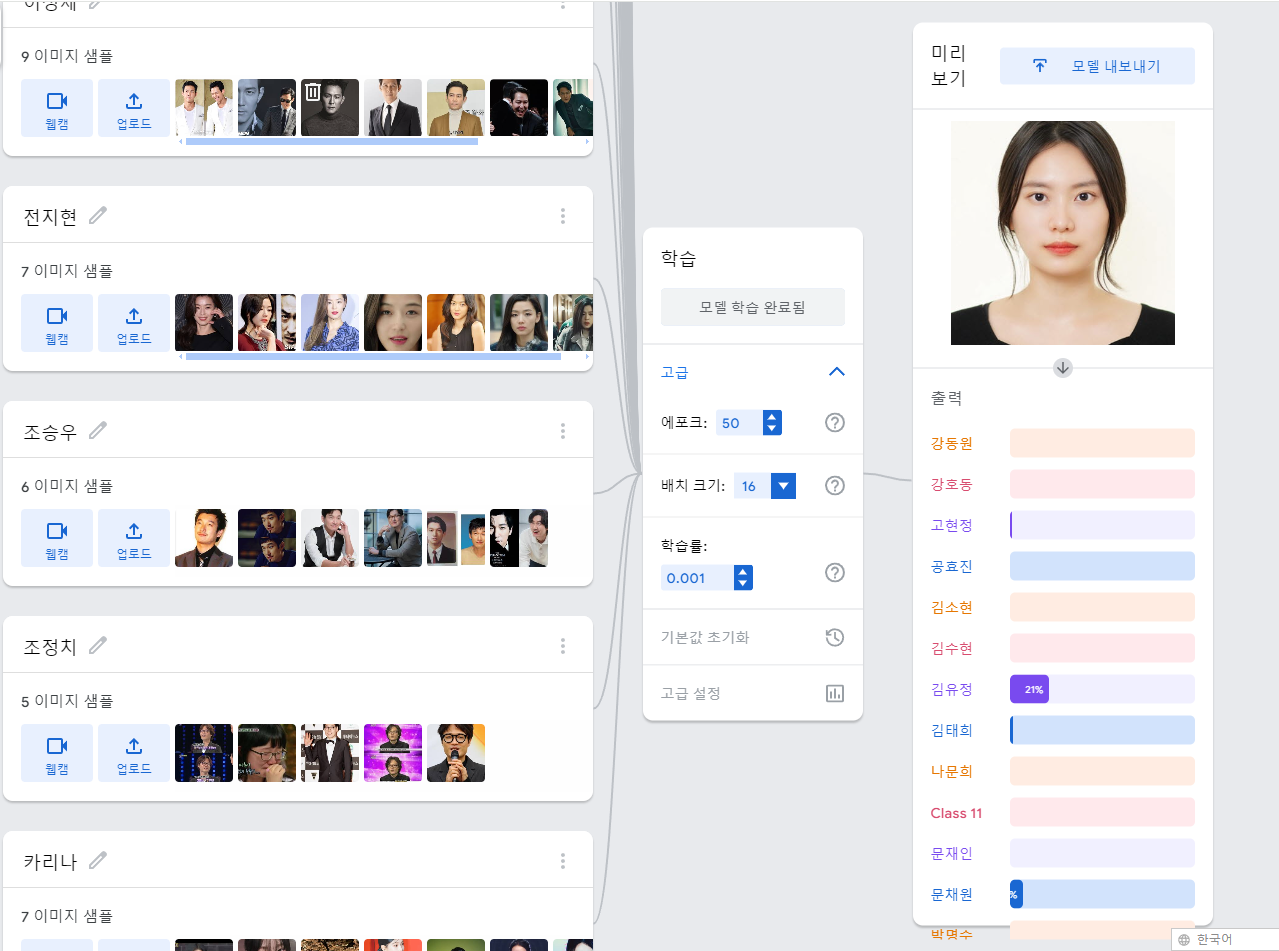

### 2. 가능하다면 여기까지..?

Teachable Machine에서 학습한 모델을 다운받은 후 tensorflow 코드를 받아 파이썬 내에서 실행하는 코드입니다.  
다만 tensorflow 최신 버전(2.16으로 알고 있음)에서는 돌아가지 않는 것으로 확인되며 돌리시려면 버전을 2.12로 낮추고 경로와 파일에 한글이 전혀 없도록 하셔야합니다.

In [48]:
pip install keras

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 46.2/46.2 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------------- ------------------------ 0.4/1.1 MB 8.7 MB/s eta 0:00:01
   -------------------------------- ------- 0.9/1.1 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB 8.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/126.8 kB ? eta -:--:--
   ---------------------------------------- 126.8/126.8 kB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/245.0 kB ? eta -:--:--
   ---------------------------------------- 245.0/245.0 kB 7.6 MB/s eta 0:00:00
Note: you may ne

In [50]:
pip install tensorflow

   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.6/377.0 MB 12.9 MB/s eta 0:00:30
   ---------------------------------------- 1.1/377.0 MB 12.0 MB/s eta 0:00:32
   ---------------------------------------- 1.6/377.0 MB 11.7 MB/s eta 0:00:33
   ---------------------------------------- 2.2/377.0 MB 12.6 MB/s eta 0:00:30
   ---------------------------------------- 2.7/377.0 MB 11.6 MB/s eta 0:00:33
   ---------------------------------------- 3.2/377.0 MB 12.0 MB/s eta 0:00:32
   ---------------------------------------- 3.8/377.0 MB 12.1 MB/s eta 0:00:31
   ---------------------------------------- 4.3/377.0 MB 12.0 MB/s eta 0:00:32
   ---------------------------------------- 4.5/377.0 MB 11.1 MB/s eta 0:00:34
    --------------------------------------- 4.8/377.0 MB 10.6 MB/s eta 0:00:36
    --------------------------------------- 5.3/377.0 MB 10.5 MB/s eta 0:00:36
    --------------------------------------- 5.6/377.0 MB 10.

In [53]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
from keras.models import load_model
model = load_model("keras_Model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("<IMAGE_PATH>").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'keras_Model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)